# This is the example of MARBLE applied to low-rank RNNs

In [1]:
%load_ext autoreload
%autoreload 2
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
import MARBLE
from MARBLE import geometry, plotting
from RNN_scripts import dms, helpers

We start by downloading some intermediate data to reproduce results. 

In [2]:
# download datasets
!mkdir data
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963161 -O data/dms_rank2_500.pt
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963162 -O data/dms_rank2_500_2.pt
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963166 -O data/dms_rank2_500_sampled_1.pt 
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963165 -O data/dms_rank2_500_sampled_2.pt 
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963163 -O data/RNN_trajectories11.pkl 
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963164 -O data/RNN_trajectories12.pkl 
!wget -nc https://dataverse.harvard.edu/api/access/datafile/6963158 -O data/RNN_trajectories2.pkl
!wget -nc https://dataverse.harvard.edu/api/access/datafile/7062817 -O data/data_solution_1.pkl
!wget -nc https://dataverse.harvard.edu/api/access/datafile/7062816 -O data/data_all_solutions.pkl
!wget -nc https://dataverse.harvard.edu/api/access/datafile/7062818 -O data/best_model_20230413-170730.pth
!wget -nc https://dataverse.harvard.edu/api/access/datafile/7062815 -O data/best_model_20230413-163551.pth

mkdir: cannot create directory ‘data’: File exists
File ‘data/dms_rank2_500.pt’ already there; not retrieving.
File ‘data/dms_rank2_500_2.pt’ already there; not retrieving.
File ‘data/dms_rank2_500_sampled_1.pt’ already there; not retrieving.
File ‘data/dms_rank2_500_sampled_2.pt’ already there; not retrieving.
File ‘data/RNN_trajectories11.pkl’ already there; not retrieving.
File ‘data/RNN_trajectories12.pkl’ already there; not retrieving.
File ‘data/RNN_trajectories2.pkl’ already there; not retrieving.


Load two RNN solutions pretrained on the DMS task

pop 0: slope=0.06, intercept=0.02
pop 1: slope=-0.24, intercept=-0.18
pop 0: slope=-0.01, intercept=-0.05
pop 1: slope=0.04, intercept=-0.01
pop 0: slope=0.03, intercept=0.17
pop 1: slope=-0.06, intercept=-0.22
pop 0: slope=0.74, intercept=0.00
pop 1: slope=0.70, intercept=0.08
pop 0: slope=-0.08, intercept=0.01
pop 1: slope=0.05, intercept=0.07
pop 0: slope=-0.01, intercept=-0.14
pop 1: slope=0.04, intercept=-0.05
pop 0: slope=-0.06, intercept=-0.32
pop 1: slope=0.09, intercept=0.38
pop 0: slope=0.72, intercept=-0.03
pop 1: slope=0.13, intercept=0.54


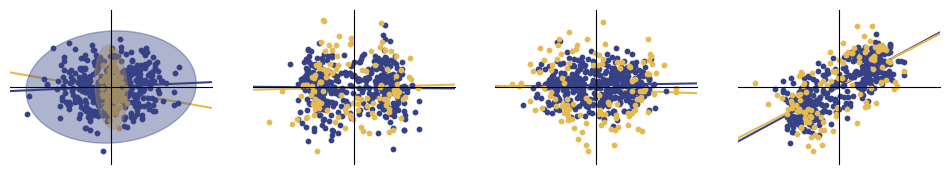

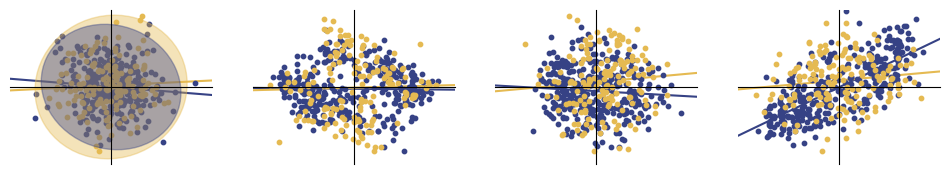

In [6]:
_, net1 = helpers.load_network('data/dms_rank2_500.pt')
_, net2 = helpers.load_network('data/dms_rank2_500_2.pt')

helpers.plot_coefficients(net1)
helpers.plot_coefficients(net2)

Display input/output trajectories

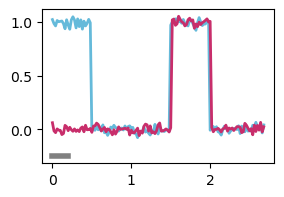

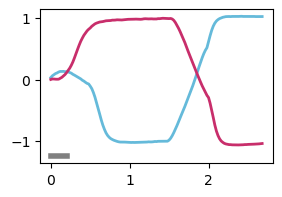

In [4]:
dms.stimulus1_duration_min = 500
dms.stimulus1_duration_max = 500
dms.delay_duration_min = 1000
dms.delay_duration_max = 1000
dms.stimulus2_duration_min = 500
dms.stimulus2_duration_max = 500
dms.decision_duration = 200
dms.setup()

x1 = dms.generate_dms_data(1, type='A-A')[0]
x2 = dms.generate_dms_data(1, type='B-A')[0]
outp1, traj1 = net1.forward(x1)
outp2, traj2 = net1.forward(x2)
x1, x2 = x1.squeeze().numpy(), x2.squeeze().numpy()
outp1 = outp1.detach().squeeze().numpy()
outp2 = outp2.detach().squeeze().numpy()

def time_mapping(t):
    return t * dms.deltaT / 1000

fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(time_mapping(np.arange(x1.shape[0])), x1[:, 0], c='#65BADA', zorder=30, lw=2)
ax.plot(time_mapping(np.arange(x1.shape[0])), x2[:, 0], c='#C82E6B', zorder=30, lw=2)
ax.plot([0, 0.2], [-.25, -.25], c='gray', lw=4)


fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(time_mapping(np.arange(outp1.shape[0])), outp1, color='#65BADA', zorder=30, lw=2)
ax.plot(time_mapping(np.arange(outp1.shape[0])), outp2, color='#C82E6B', zorder=30, lw=2)
ax.plot([0, 0.2], [-1.25, -1.25], c='gray', lw=4)

Create new network by fitting Gaussian mixture to the connectivity space

Network found with same name. Loading...
Network found with same name. Loading...
pop 0: slope=0.13, intercept=0.00
pop 1: slope=0.23, intercept=-0.05
pop 0: slope=-0.01, intercept=0.09
pop 1: slope=0.36, intercept=-0.45
pop 0: slope=0.08, intercept=0.10
pop 1: slope=-0.18, intercept=-0.82
pop 0: slope=0.74, intercept=-0.06
pop 1: slope=0.45, intercept=0.36
pop 0: slope=0.11, intercept=0.01
pop 1: slope=-0.32, intercept=-0.01
pop 0: slope=-0.16, intercept=-0.08
pop 1: slope=-0.16, intercept=-0.15
pop 0: slope=0.01, intercept=0.08
pop 1: slope=-0.09, intercept=-0.03
pop 0: slope=0.76, intercept=0.00
pop 1: slope=0.88, intercept=0.03


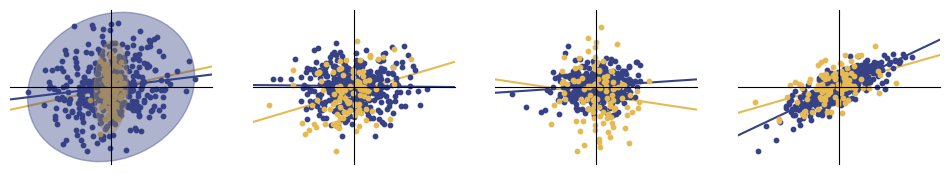

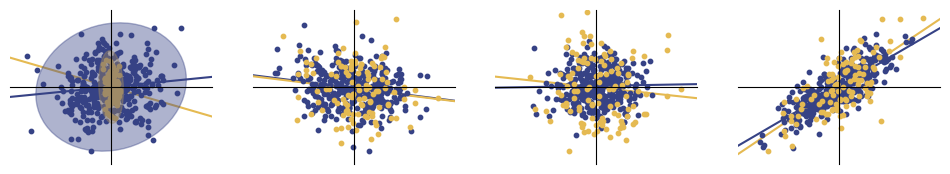

In [7]:
_, net1_sampled_1 = helpers.sample_network(net1, 'data/dms_rank2_500_sampled_1.pt')
_, net1_sampled_2 = helpers.sample_network(net1, 'data/dms_rank2_500_sampled_2.pt')

helpers.plot_coefficients(net1_sampled_1)
helpers.plot_coefficients(net1_sampled_2)

Generate synthetic data using the two RNNs

In [61]:
stim1_begin, stim1_end, stim2_begin, stim2_end, decision = 25, 50, 200, 225, 275
epochs = [0, stim1_begin, stim1_end, stim2_begin, stim2_end, decision]

n_gains=20
gain = np.linspace(1, 0, n_gains)
    
input_data = torch.zeros(n_gains, decision, 2)
for i, g in enumerate(gain):
    input_data[i, stim1_begin:stim1_end, 0] = g
    input_data[i, stim2_begin:stim2_end, 0] = g
    
# uncomment below to generate trajectories (slow, if not loading existing file) 
n_traj=200
traj11 = helpers.generate_trajectories(net1_sampled_1, input_data, epochs, n_traj, fname='data/RNN_trajectories11.pkl')
traj12 = helpers.generate_trajectories(net1_sampled_2, input_data, epochs, n_traj, fname='data/RNN_trajectories12.pkl')
traj2 = helpers.generate_trajectories(net2, input_data, epochs, n_traj, fname='data/RNN_trajectories2.pkl')

Trajectory file found with same name. Loading...
Trajectory file found with same name. Loading...
Trajectory file found with same name. Loading...


Plot phase portraits of two different dynamics  

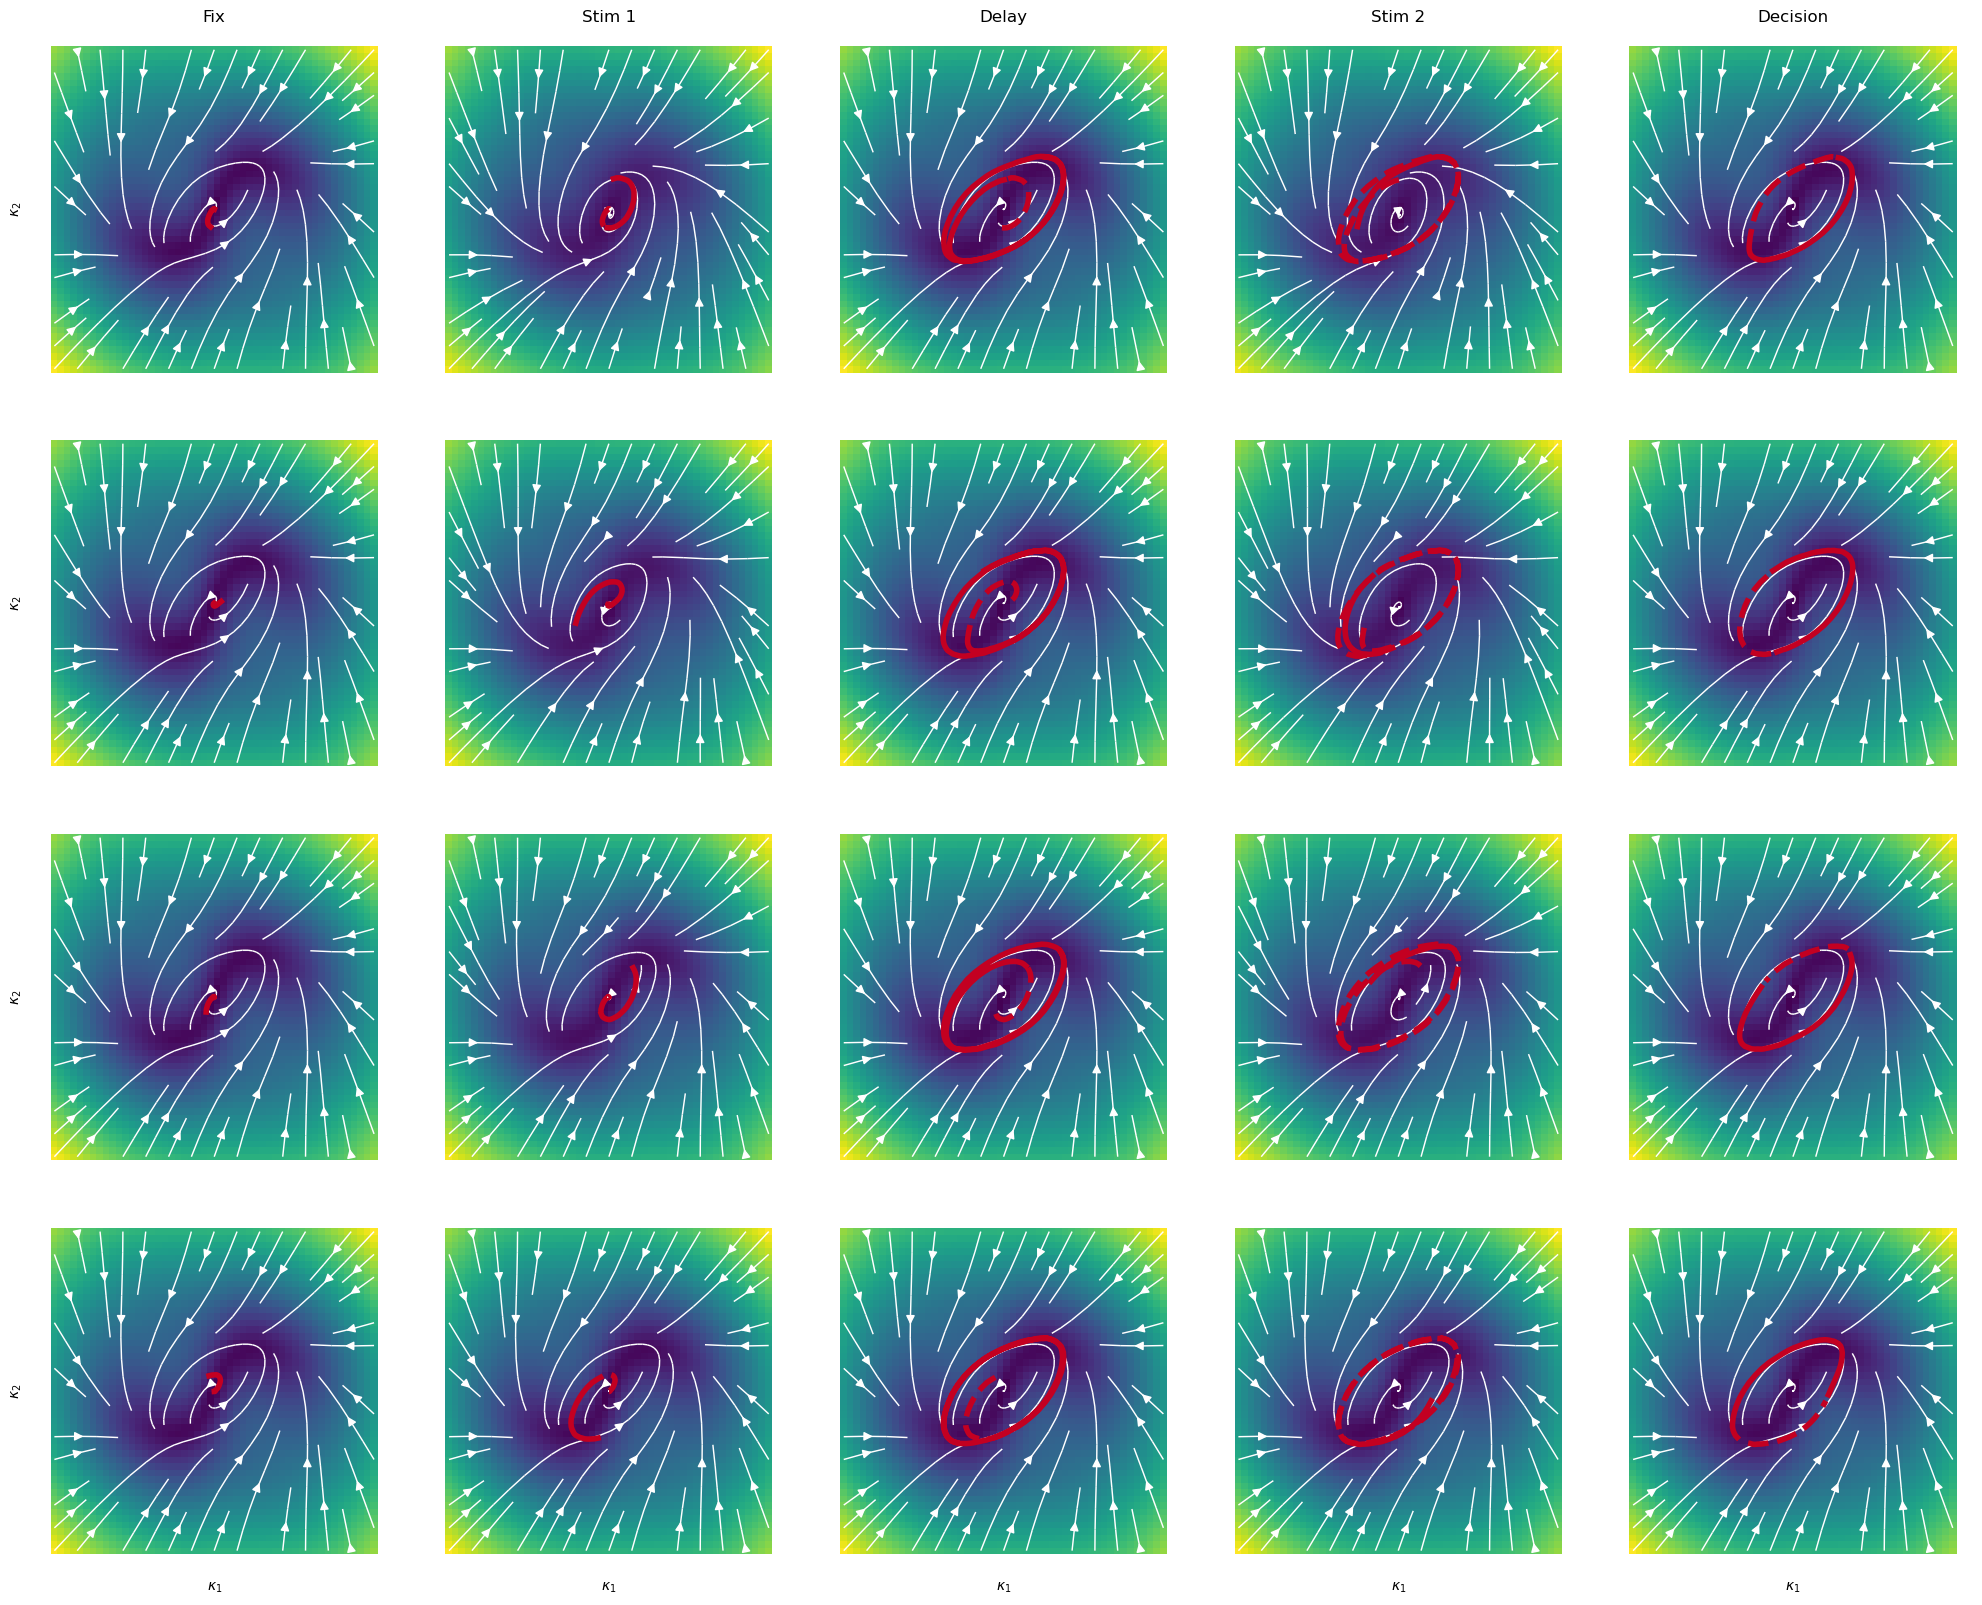

In [23]:
helpers.plot_experiment(net1_sampled_1, input_data, traj11, epochs, rect=(-6, 6, -4, 4), traj_to_show=1)

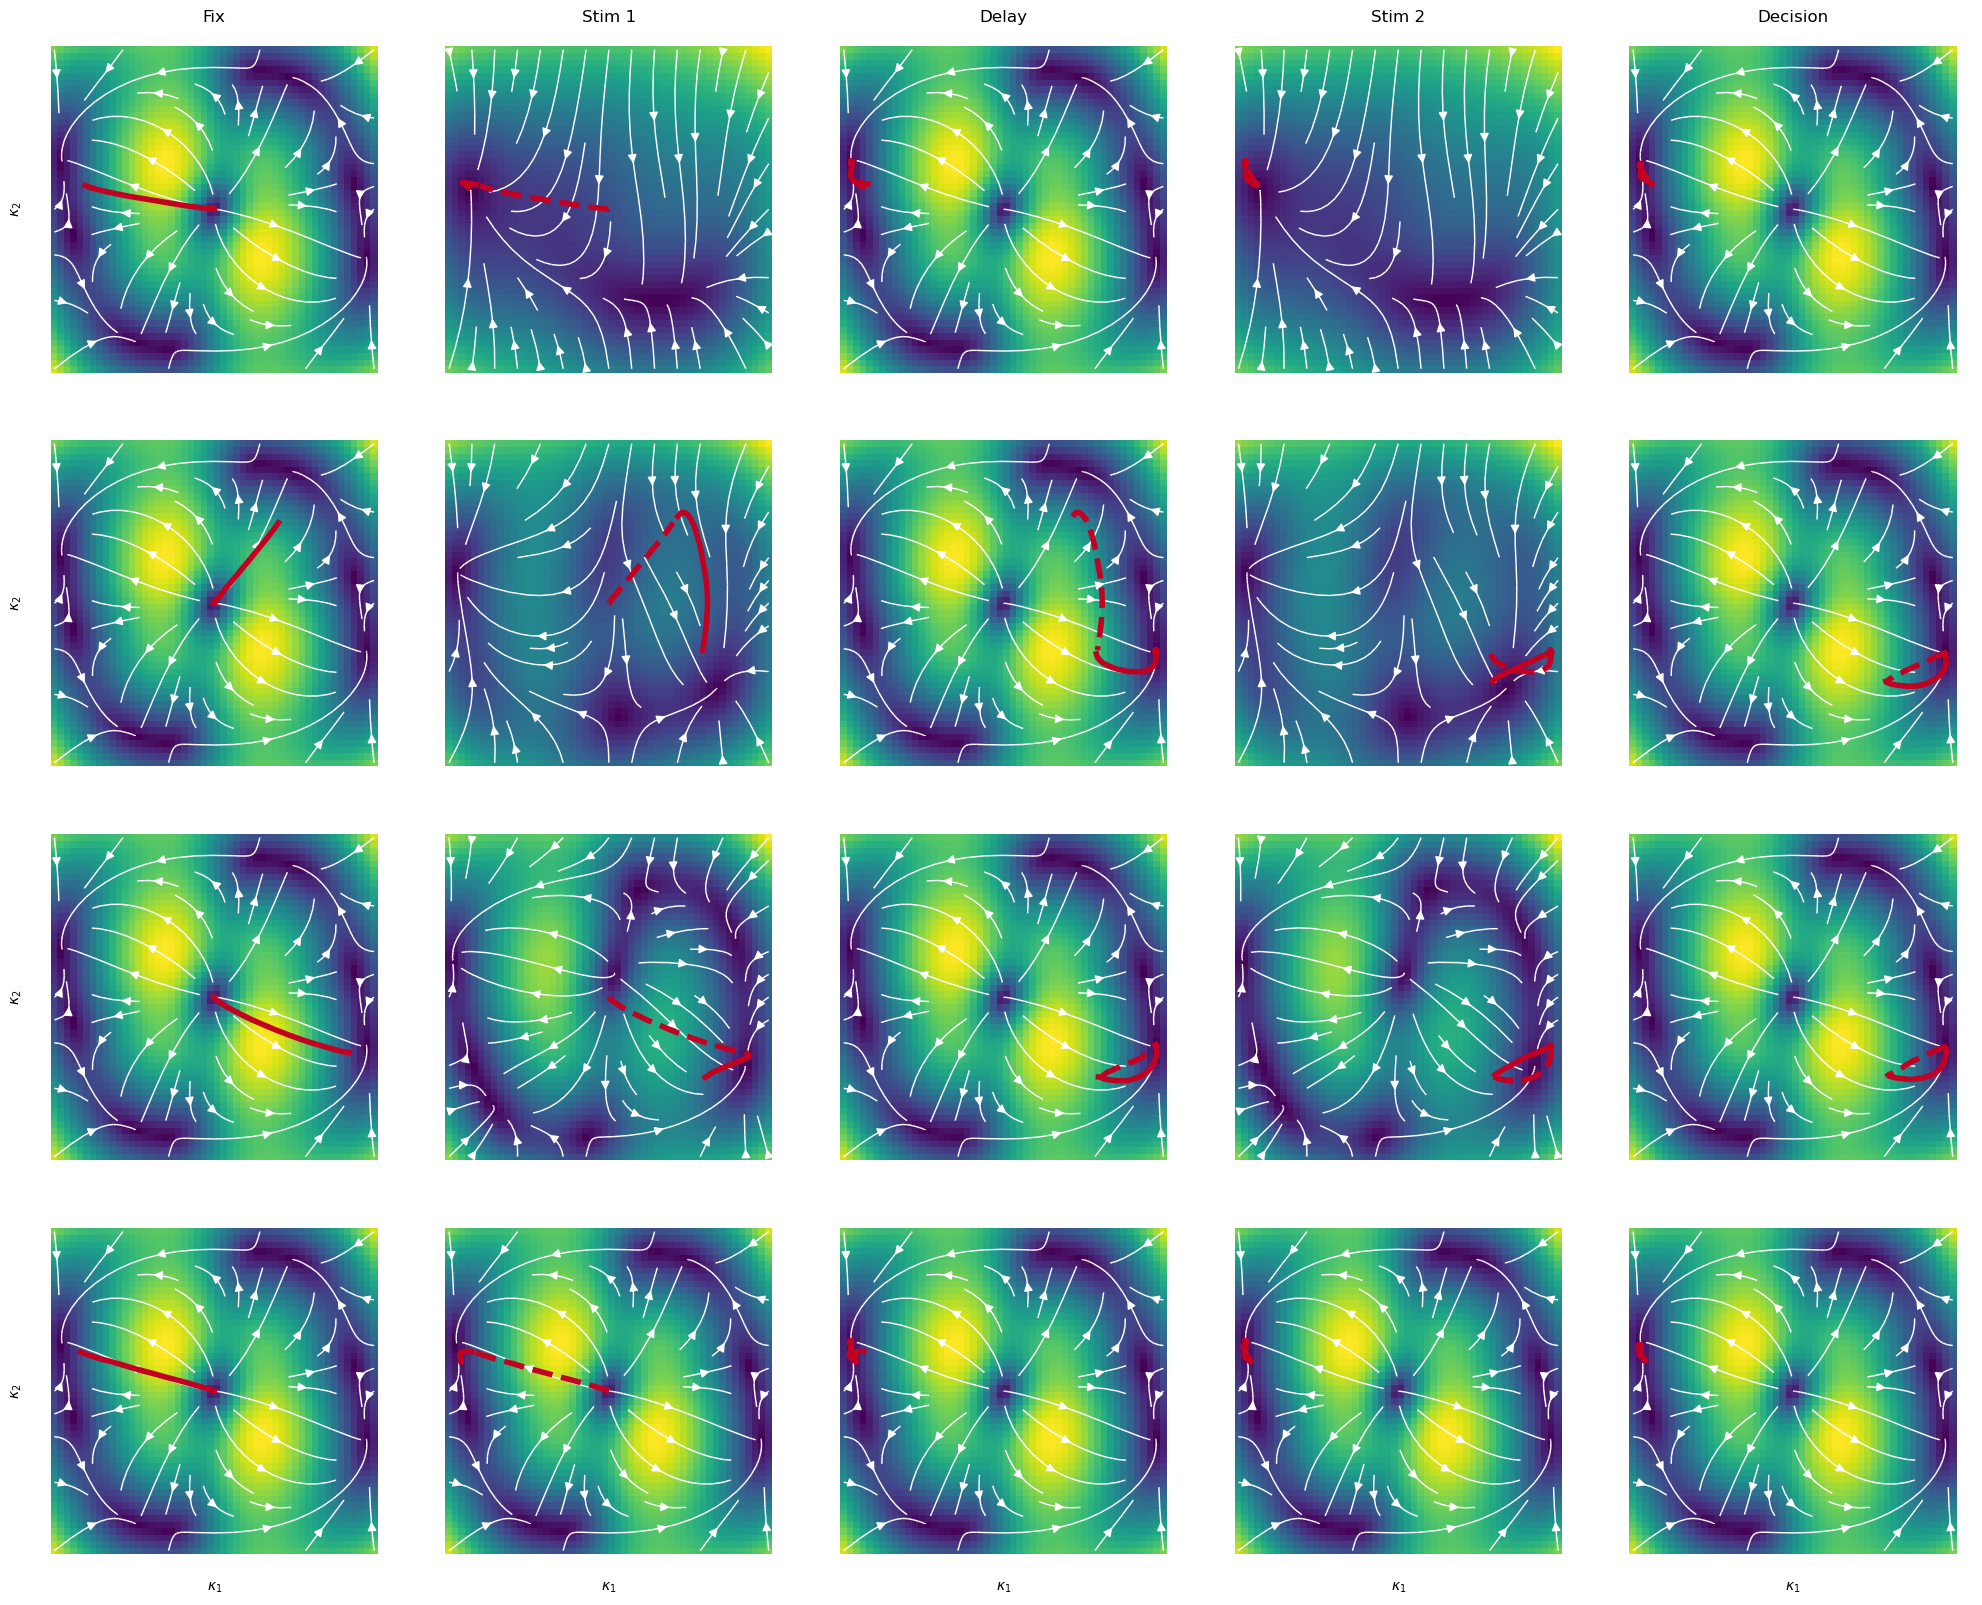

In [24]:
helpers.plot_experiment(net2, input_data, traj2, epochs, rect=(-6, 6, -4, 4), traj_to_show=1)

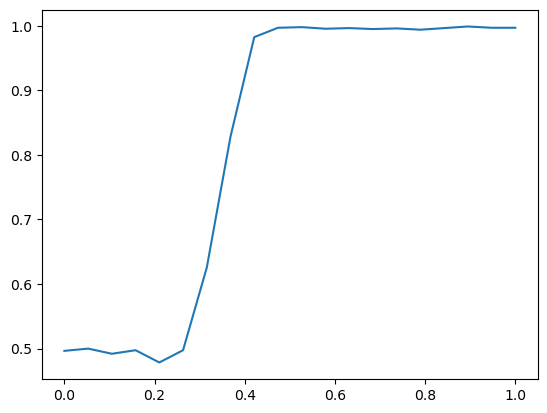

In [25]:
accuracy = []
for g in gain:
    _, _, _, x_val, y_val, mask_val = dms.generate_dms_data(10000, gain=g)
    loss, acc = dms.test_dms(net1, x_val, y_val, mask_val)
    accuracy.append(acc)
    
plt.plot(gain, accuracy)

Concatenate data and create datasets

In [63]:
transient = 15 #clip 15 timesteps
pos11, vel11 = helpers.aggregate_data(traj11, epochs, transient)

Explained variance:  [0.81756015 0.15379926 0.0237615 ]


Train a model on network solution 1

In [64]:
data = pickle.load(open('data_solution_1.pkl','rb')) #if you're impatient
#data = MARBLE.construct_dataset(pos11, features=vel11, graph_type='cknn', k=15, stop_crit=0.01) # takes 5-10 mins

---- Embedding dimension: 3
---- Signal dimension: 3


---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 


In [65]:
params = {'epochs': 40, 
          'order': 2, 
          'hidden_channels': 64, 
          'out_channels': 5,
          'inner_product_features': False, #geometry-aware for maximal expressivity
          }

model = MARBLE.net(data, loadpath='data/best_model_20230413-163551.pth')
#model = MARBLE.net(data, params=params)
#model.run_training(data, outdir='data')


---- Settings: 

epochs : 40
order : 2
hidden_channels : 64
out_channels : 5
inner_product_features : False
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
frac_sampled_nb : -1
include_positions : False
include_self : True
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  39
---- Total number of parameters:  2886

---- Training network ...

Epoch: 0, Training loss: 1.112303, Validation loss: 1.0523, lr: 0.0100 *
Epoch: 1, Training loss: 1.015531, Validation loss: 0.9970, lr: 0.0100 *
Epoch: 2, Training loss: 0.993213, Validation loss: 1.0049, lr: 0.0100
Epoch: 3, Training loss: 0.966824, Validation loss: 0.9352, lr: 0.0100 *
Epoch: 4, Training loss: 0.959607, Validation loss: 0.9260, lr: 0.0100 *
Epoch: 5, Training loss: 0.956831, Validation loss: 0.9439, lr: 0.0100
Epoch: 6, Training loss: 0.949039, Validation loss: 0.9531, lr: 0.010

In [66]:
data = model.evaluate(data)
data = MARBLE.distribution_distances(data, n_clusters=60)

Cluster and plot distance matrix

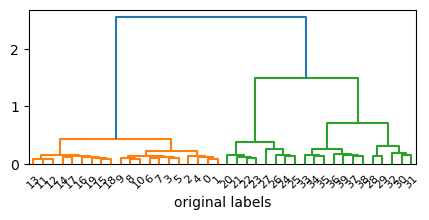

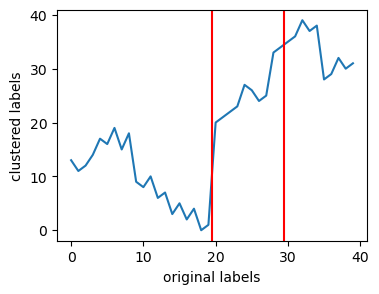

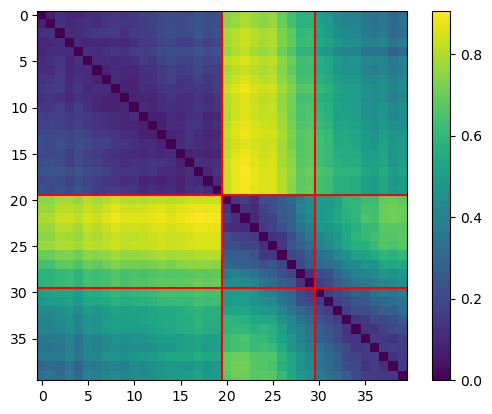

In [67]:
from scipy.cluster.hierarchy import dendrogram                                                          
from scipy.cluster.hierarchy import linkage                                                             
from scipy.spatial.distance import squareform   

def cluster_matrix(df, distance=False, ax=None):                                                                 
    """Return sorted labels to cluster a matrix with linkage.                                           
                                                                                                        
    If distance matrix already set distance=True.                                                       
    """                                                                                                 
                                                                                                        
    with np.errstate(divide="ignore", invalid="ignore"):                                                
        _data = df if distance else 1.0 / df                              
                                                                                                        
    _data[_data > 1e10] = 1000                                                                          
    np.fill_diagonal(_data, 0.0)                                                                        
    dists = squareform(_data)                                                                           
    Z = linkage(dists, "ward")                                                                          
    labels = np.arange(0, len(df))                                                                     
    dn = dendrogram(Z, labels=labels, ax=ax)                                                     
    return labels[dn["leaves"]]     

plt.figure(figsize=(5, 2))
l = cluster_matrix(data.dist, distance=True, ax=plt.gca())
plt.xlabel('original labels')

plt.figure(figsize=(4, 3))
plt.plot(np.arange(0, len(data.dist)), l)
plt.xlabel('original labels')
plt.ylabel('clustered labels')
plt.axvline(len(data.dist)/2-0.5, c='r')
plt.axvline(3*len(data.dist)/4-0.5, c='r')

plt.figure()
im = plt.imshow(data.dist)
plt.colorbar(im)
plt.axhline(len(data.dist)/2-0.5, c='r')
plt.axhline(3*len(data.dist)/4-0.5, c='r')
plt.axvline(len(data.dist)/2-0.5, c='r')
plt.axvline(3*len(data.dist)/4-0.5, c='r')

# Train network with solution I and solution II

In [80]:
transient = 15 #clip 15 timesteps
pos11, vel11 = helpers.aggregate_data(traj11, epochs, transient)
pos12, vel12 = helpers.aggregate_data(traj12, epochs, transient)
pos2, vel2 = helpers.aggregate_data(traj2, epochs, transient)

pos = pos11 + pos12 + pos2
vel = vel11 + vel12 + vel2

Explained variance:  [0.81756033 0.15379932 0.02376149]
Explained variance:  [0.81453533 0.1454337  0.03331408]
Explained variance:  [0.93046279 0.04519978 0.02326666]


In [81]:
data2 = pickle.load(open('data_all_solutions.pkl','rb')) #if you're impatient
#data2 = MARBLE.construct_dataset(pos, features=vel, graph_type='cknn', k=15, stop_crit=0.01) # takes up to 15 mins

---- Embedding dimension: 3
---- Signal dimension: 3


---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 


In [82]:
params = {'epochs': 40,
          'order': 2,
          'hidden_channels': 64,
          'out_channels': 5,
          'inner_product_features': True, #geometry-agnostic as manifolds are differently oriented across networks
         }

model2 = MARBLE.net(data2, loadpath='data/best_model_20230413-170730.pth')
#model2 = MARBLE.net(data2, params=params)
#model2.run_training(data2, outdir='data')


---- Settings: 

epochs : 40
order : 2
hidden_channels : 64
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
frac_sampled_nb : -1
include_positions : False
include_self : True
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  1339

---- Training network ...

Epoch: 0, Training loss: 1.162115, Validation loss: 1.1169, lr: 0.0100 *
Epoch: 1, Training loss: 1.029147, Validation loss: 1.0538, lr: 0.0100 *
Epoch: 2, Training loss: 1.000314, Validation loss: 1.0359, lr: 0.0100 *
Epoch: 3, Training loss: 0.981098, Validation loss: 1.0334, lr: 0.0100 *
Epoch: 4, Training loss: 0.970342, Validation loss: 1.0298, lr: 0.0100 *
Epoch: 5, Training loss: 0.969183, Validation loss: 1.0265, lr: 0.0100 *
Epoch: 6, Training loss: 0.967026, Validation loss: 1.0146, lr: 0.

In [83]:
data2 = model2.evaluate(data2)
data2 = MARBLE.distribution_distances(data2, n_clusters=60)

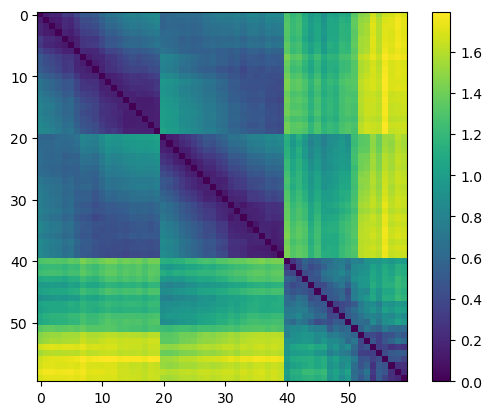

In [86]:
n = len(data2.dist) // 6
dist = data2.dist[:2 * n,:2 * n]
ind = list(range(n,2 * n)) + list(range(3 * n,4 * n)) + list(range(5 * n,6 * n))
dist = data2.dist[ind,:][:,ind]
im = plt.imshow(dist)
plt.colorbar(im)

Performed MDS embedding on embedded results.


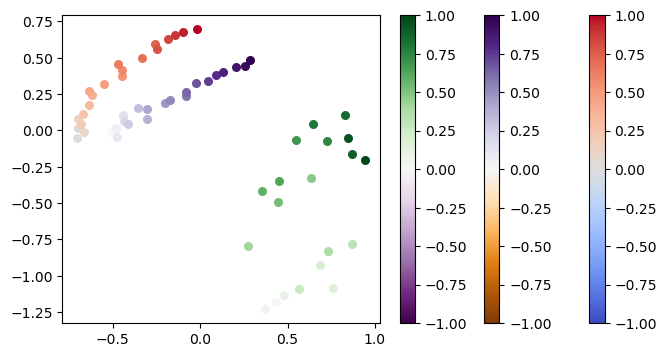

In [87]:
labels = [g for g in gain ]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
emb_MDS, _ = geometry.embed(dist, embed_typ = 'MDS')
ax = plotting.embedding(emb_MDS[:n], labels, ax=ax, s=30, alpha=1, axes_visible=True)
ax = plotting.embedding(emb_MDS[n:2*n], labels, ax=ax, s=30, alpha=1, axes_visible=True, cmap='PuOr')
ax = plotting.embedding(emb_MDS[2*n:], labels, ax=ax, s=30, alpha=1, axes_visible=True, cmap='PRGn')